# ML preprocessing

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size= 0.3, random_state = 0) ## 30% of wine samples assigned to X_test and y_test

In [4]:
# we could normalize the feature set easily
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [5]:
## for most MLA's using standardization is more useful: centering the feature columns at mean 0 with SD 1 so that the feature 
## columns take the form of a normal distibution, which makes it easier to learn the weights. (useful for logistic regression,
## SVM)
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [6]:
ex = pd.DataFrame([0, 1, 2, 3, 4, 5])

# standardize
ex[1] = (ex[0] - ex[0].mean()) / ex[0].std(ddof=0) #ddof = degrees of freedom

# Please note that pandas uses ddof=1 (sample standard deviation) 
# by default, whereas NumPy's std method and the StandardScaler
# uses ddof=0 (population standard deviation)

# normalize
ex[2] = (ex[0] - ex[0].min()) / (ex[0].max() - ex[0].min())
ex.columns = ['input', 'standardized', 'normalized']
ex

,input,standardized,normalized
0,0,-1.46385,0.0
1,1,-0.87831,0.2
2,2,-0.29277,0.4
3,3,0.29277,0.6
4,4,0.87831,0.8
5,5,1.46385,1.0


## handling categorical data

In [7]:
df = pd.DataFrame([['green', 'M', 10.1, 'class1'], 
              ['red', 'L', 20.5, 'class2'], 
              ['blue', 'XL', 30, 'class1'], 
              ['yellow', 'M', 10.1, 'class3'], 
              ['orange', 'S', 6.8, 'class2']], columns = ['color', 'size', 'price', 'classlabel'])
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,20.5,class2
2,blue,XL,30.0,class1
3,yellow,M,10.1,class3
4,orange,S,6.8,class2


In [8]:
## mapping the ordial features (for which order DOES apply: S-->M-->L--XL)
size_mapping = {'XL': 4,
                'L': 3,
                'M': 2,
                'S': 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,2,10.1,class1
1,red,3,20.5,class2
2,blue,4,30.0,class1
3,yellow,2,10.1,class3
4,orange,1,6.8,class2


In [9]:
# to reverse the mapping:
reverse_mapping = {v : k for k, v in size_mapping.items()}
df['size'].map(reverse_mapping)

0     M
1     L
2    XL
3     M
4     S
Name: size, dtype: object

In [10]:
## encoding class labels
class_mapping = {label:idx for idx, label in enumerate(np.unique(df['classlabel']))}
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,2,10.1,0
1,red,3,20.5,1
2,blue,4,30.0,0
3,yellow,2,10.1,2
4,orange,1,6.8,1


In [62]:
class_mapping

{'class1': 0, 'class2': 1, 'class3': 2}

In [63]:
# and same trick to reverse:
reverse_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'].map(reverse_class_mapping)

0    class1
1    class2
2    class1
3    class3
4    class2
Name: classlabel, dtype: object

In [64]:
# and off course the convenience wrapper from sklearn to achieve the same result
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
class_le.fit_transform(df['classlabel'].values)

In [82]:
## OnehotEncoder we transform the first column of the feature matrix X, returning a sparse Matrix when we use the transform method 
# and then converting it into a regular dense numpy array
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[  0. ,   1. ,   0. ,   0. ,   0. ,   2. ,  10.1],
       [  0. ,   0. ,   0. ,   1. ,   0. ,   3. ,  20.5],
       [  1. ,   0. ,   0. ,   0. ,   0. ,   4. ,  30. ],
       [  0. ,   0. ,   0. ,   0. ,   1. ,   2. ,  10.1],
       [  0. ,   0. ,   1. ,   0. ,   0. ,   1. ,   6.8]])

## Selecting meaningful features

- first technique regularization

In [11]:
#L1 vs L2 regularization 
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.983870967742
Test accuracy: 0.981481481481


In [13]:
## 3 classes due to the One-vs_Rest approach (OvR): first intercept belongs to the model that fits class 1 vs class 2 & 3, etc..
lr.intercept_ 

array([-0.38381601, -0.1580803 , -0.70034688])

In [14]:
## 3 classes each w 13 weight (features in wineset), The weight factors are sparse which means they only have a few non-zero entries. 
# due to the L1 regularization, serving as a method of feature selection, we just trained our model that is now robust
# against any potentially irrelevant features in the dataset
lr.coef_ 

array([[ 0.28035271,  0.        ,  0.        , -0.02806479,  0.        ,
         0.        ,  0.71010614,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23580211],
       [-0.64399687, -0.0687477 , -0.05719848,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92675844,
         0.06016697,  0.        , -0.37103416],
       [ 0.        ,  0.06140551,  0.        ,  0.        ,  0.        ,
         0.        , -0.637155  ,  0.        ,  0.        ,  0.49861622,
        -0.35818262, -0.56993412,  0.        ]])

In [16]:
lr.coef_[1]

array([-0.64399687, -0.0687477 , -0.05719848,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.92675844,
        0.06016697,  0.        , -0.37103416])

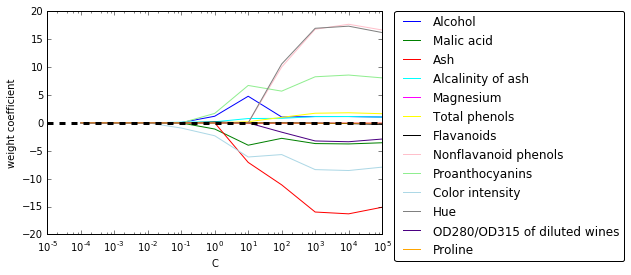

In [94]:
fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1', C = 10**c, random_state=0) #Inverse of regularization strength; must be a positive float.
                                                                     #Like in support vector machines, smaller values specify 
                                                                     # stronger regularization.
    lr.fit(X_train, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights) 

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)

## Selecting meaningful features

- first dim reduction feature selection
A classic sequential feature selection algorithm is **SBS (Sequential Backward Selection)**: it sequentially removes features from the full feature subset until tje new feature subspace contains the desired number of features. In order to defie which features need to be removed, we need to define a criterion function (j) that we want to minimize.

The criterion calculated by j can simply be the difference in performance of the classifier after and prio to the removal of the features. Then the features to be removed at each stage can simply be defined as the features that maximizes this criterion j. Or i.o.w.: at each stage of SBS we eliminate the feature that causes the least performance loss.

+ initialize SBS with k=d (d = the full dimensionality of the feature space
+ determine the feature x that maximizes the criterion x = argmaxJ(Xk -x)
+ remove the features x from the feature subset
+ determine if k equals the number of desired features, if not, go to step 2

In [105]:
from sklearn.base import clone # Clone does a deep copy of the model in an estimator without actually copying attached data
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    """
    k_features: desired number of features we would like to see returned.
    In the wile loop of the fit method, the feature subsets are evaluated and reduced until 
    the feature subset has the desired dimensionality.
    -in each iteration the accuracy score of the best subset is collected in a list 'self.scores_'
    """
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

in this implemantation , we defined the k_features parameter to specify the desired number of features we want to return. By default, we use the accuracy_score from sklearn to evaluate the performance of the model and estimator for classification on the feature subsets.

Inside the while loop of the fit method, the feature subsets created by the **itertools.combination** function are evaluated and reduced until the feature subset has the desired dimensionality.

In each iteration, the accuracy_score of the best subset is collected in a list **self.scores** based on the internally created test dataset X_test. The column indices of the final feature subset are assigned to **self.indices**, which can be used via the transform method to return a new data array with the selected feature columns. Note that, instead of calculating the criterion explicitly inside the fit method, we simply removed the feature that is not contained in the best performing feature subset

In [104]:
dir(SBS)

['__doc__', '__init__', '__module__', '_calc_score', 'fit', 'transform']

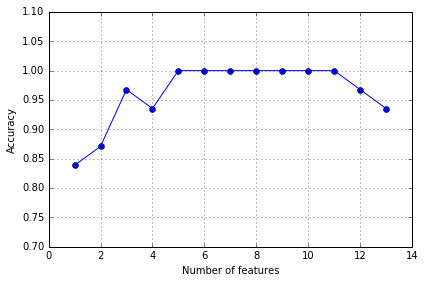

In [108]:
## let's the SBS implemenatation in action using the KNN classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()

the accuracy of the KNN classifier improved on the validation datasets as we reduced the number of features, which is likely due to a reduction of the curse of dimensionality. The classifier achieved 100% accuracy for k= [ 5,6,7,8,9,10 ]

In [39]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 6, 7, 8, 9, 10, 12),
 (0, 1, 2, 3, 6, 7, 8, 10, 12),
 (0, 1, 2, 3, 6, 8, 10, 12),
 (0, 1, 3, 6, 8, 10, 12),
 (0, 1, 3, 6, 10, 12),
 (0, 1, 3, 10, 12),
 (0, 1, 10, 12),
 (0, 1, 10),
 (0, 10),
 (0,)]

In [111]:
list(sbs.subsets_[8])

[0, 1, 3, 10, 12]

In [112]:
# which features yielded such a good performance:
k5 = list(sbs.subsets_[8])
print (df_wine.columns[1:])[k5]

Index([u'Alcohol', u'Malic acid', u'Alcalinity of ash', u'Hue', u'Proline'], dtype='object')


In [113]:
# let's evaluate the performance of the KNN classifier on the original test set. The score is higher 
# on the training indicating a slight degree of overfitting
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

('Training accuracy:', 0.9838709677419355)
('Test accuracy:', 0.94444444444444442)


In [114]:
## if we fit it onto the 5-feature subset..voila !! better score
knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k5], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k5], y_test))

('Training accuracy:', 0.95967741935483875)
('Test accuracy:', 0.96296296296296291)


## Assessing feature importance with Random Forests

Using random forest we can measure feature importance as the averaged impurity decrease computed from all decision trees in the forest w/o making any assumption about wheter our data is linearly separable or not. Conveniently the Random Forest algorithm already select feature importance for us acessible via the feature importances_attribute after fitting a RandomForestClassifier

 1) Color intensity                0.182483
 2) Proline                        0.158610
 3) Flavanoids                     0.150948
 4) OD280/OD315 of diluted wines   0.131987
 5) Alcohol                        0.106589
 6) Hue                            0.078243
 7) Total phenols                  0.060718
 8) Alcalinity of ash              0.032033
 9) Malic acid                     0.025400
10) Proanthocyanins                0.022351
11) Magnesium                      0.022078
12) Nonflavanoid phenols           0.014645
13) Ash                            0.013916


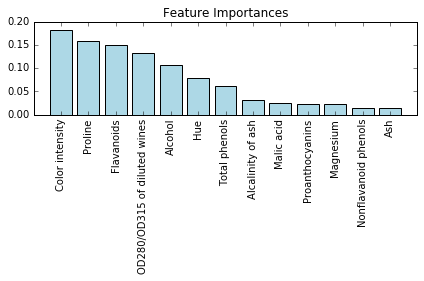

In [117]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

"""
Forest a 10.000 trees on the wine dataset and rank the 13 features by their respective 
importance measure. We dont'need to use standardized or normalized tree-based models
"""

forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

The color intensity of wine is the most discriminative feature in the dataset based on the average impurity decrease in the 10.000 decision trees. 